# HS2APO 
Bárdos Deák Botond
For plots and help in model creation i use Chat-GPT

In [1]:
import pandas as pd
    
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# load the data

In [2]:
df=pd.read_csv('./PetersonBarney/verified_pb.data',sep='\t',header=None)
df.columns=['M/F/C','SPKR','Phoneme-Number','Phoneme-Ascii','F0','F1','F2','F3']
df

,M/F/C,SPKR,Phoneme-Number,Phoneme-Ascii,F0,F1,F2,F3
0,1,1,1,IY,160.0,240.0,2280.0,2850.0
1,1,1,1,IY,186.0,280.0,2400.0,2790.0
2,1,1,2,IH,203.0,390.0,2030.0,2640.0
3,1,1,2,IH,192.0,310.0,1980.0,2550.0
4,1,1,3,EH,161.0,490.0,1870.0,2420.0
...,...,...,...,...,...,...,...,...
1515,3,76,8,UH,322.0,610.0,1550.0,3400.0
1516,3,76,9,UW,345.0,520.0,1250.0,3460.0
1517,3,76,9,UW,334.0,500.0,1140.0,3380.0
1518,3,76,10,ER,308.0,740.0,1850.0,2160.0


In [3]:
df['Phoneme-Number']=df['Phoneme-Number']-1
df['Phoneme-Number'].unique()


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
X=df[['M/F/C','F0','F1','F2','F3']]
y=df[['Phoneme-Number']]


# Gaussian MIxture 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model= GaussianMixture(n_components=10, random_state=0)
model.fit(X_train)

predicted_labels_train = model.predict(X_train)
predicted_labels_test = model.predict(X_test)

# (Optional) Evaluate accuracy by comparing with true labels
train_accuracy = accuracy_score(y_train, predicted_labels_train)
test_accuracy = accuracy_score(y_test, predicted_labels_test)

print('Accuracy without normalizing the data:\n',f"Train Accuracy: {train_accuracy * 100:.2f}%" ,'\n',f"Test Accuracy: {test_accuracy * 100:.2f}%")


Accuracy without normalizing the data:
 Train Accuracy: 8.72% 
 Test Accuracy: 10.20%


# Prediction without F0

In [6]:
X=df[['M/F/C','F1','F2','F3']]
y=df[['Phoneme-Number']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model= GaussianMixture(n_components=10, random_state=0)
model.fit(X_train)

predicted_labels_train = model.predict(X_train)
predicted_labels_test = model.predict(X_test)

# (Optional) Evaluate accuracy by comparing with true labels
train_accuracy = accuracy_score(y_train, predicted_labels_train)
test_accuracy = accuracy_score(y_test, predicted_labels_test)

print('Accuracy without F0 variable:\n',f"Train Accuracy: {train_accuracy * 100:.2f}%" ,'\n',f"Test Accuracy: {test_accuracy * 100:.2f}%")


Accuracy without F0 variable:
 Train Accuracy: 12.66% 
 Test Accuracy: 14.14%


## Min max scaling

In [7]:
def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())
df_norm=df
df_norm['F0'] = min_max_scaling(df_norm['F0'])
df_norm['F1'] = min_max_scaling(df_norm['F1'])
df_norm['F2'] = min_max_scaling(df_norm['F2'])
df_norm['F3'] = min_max_scaling(df_norm['F3'])

df_norm.head()

,M/F/C,SPKR,Phoneme-Number,Phoneme-Ascii,F0,F1,F2,F3
0,1,1,0,IY,0.266409,0.045045,0.563934,0.486577
1,1,1,0,IY,0.366795,0.081081,0.603279,0.466443
2,1,1,1,IH,0.432432,0.180180,0.481967,0.416107
3,1,1,1,IH,0.389961,0.108108,0.465574,0.385906
4,1,1,2,EH,0.270270,0.270270,0.429508,0.342282


In [8]:
X=df_norm[['M/F/C','F0','F1','F2','F3']]
y=df_norm[['Phoneme-Number']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:

model= GaussianMixture(n_components=10, random_state=0)
model.fit(X_train)

predicted_labels_train = model.predict(X_train)
predicted_labels_test = model.predict(X_test)

# (Optional) Evaluate accuracy by comparing with true labels
train_accuracy = accuracy_score(y_train, predicted_labels_train)
test_accuracy = accuracy_score(y_test, predicted_labels_test)

print('Accuracy with min max scaling:\n',f"Train Accuracy: {train_accuracy * 100:.2f}%" ,'\n',f"Test Accuracy: {test_accuracy * 100:.2f}%")


Accuracy with min max scaling:
 Train Accuracy: 9.38% 
 Test Accuracy: 9.87%


## prediction without F0

In [10]:
X=df_norm[['M/F/C','F1','F2','F3']]
y=df_norm[['Phoneme-Number']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model= GaussianMixture(n_components=10, random_state=0)
model.fit(X_train)

predicted_labels_train = model.predict(X_train)
predicted_labels_test = model.predict(X_test)

# (Optional) Evaluate accuracy by comparing with true labels
train_accuracy = accuracy_score(y_train, predicted_labels_train)
test_accuracy = accuracy_score(y_test, predicted_labels_test)

print('Accuracy with min max scaling without F0 variable:\n',f"Train Accuracy: {train_accuracy * 100:.2f}%" ,'\n',f"Test Accuracy: {test_accuracy * 100:.2f}%")


Accuracy with min max scaling without F0 variable:
 Train Accuracy: 18.75% 
 Test Accuracy: 16.78%


 The best result is normalizing without the F0 variable

# different methods

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd

In [12]:
X_train, X_test = train_test_split(df, test_size=0.1, random_state=42)
X_train, X_val = train_test_split(X_train, test_size=0.1, random_state=42)
print('Train size: \t',len(X_train),'\n Val size:\t',len(X_val),'\n Test size:\t',len(X_test))

Train size: 	 1231 
 Val size:	 137 
 Test size:	 152


In [13]:
# Custom Dataset Class
class MyDataset(Dataset):
    def __init__(self, dataframe):
        # Initialize with data
        self.data = dataframe[['M/F/C','F0','F1','F2','F3']].values  # First 7 columns as input
        self.labels = dataframe[['Phoneme-Number']].values  # Last column as labels
    
    def __len__(self):
        # Return the total number of samples
        return len(self.data)
    
    def __getitem__(self, idx):
        # Return a single sample and its label
        feature = torch.tensor(self.data[idx], dtype=torch.float32)  # Convert to tensor
        label = torch.tensor(self.labels[idx], dtype=torch.long)  # Convert label to tensor (for classification)
        return feature, label


In [14]:
dataset = MyDataset(X_train)
train_loader = DataLoader(dataset, batch_size=64, shuffle=True,num_workers=2)
dataset = MyDataset(X_val)
val_loader = DataLoader(dataset, batch_size=64, shuffle=True,num_workers=2)
dataset = MyDataset(X_test)
test_loader = DataLoader(dataset, batch_size=64, shuffle=True,num_workers=2)

'''
for batch in train_loader:
    features, labels = batch
    print("Features:", features)
    print("Labels:", labels)
'''

'\nfor batch in train_loader:\n    features, labels = batch\n    print("Features:", features)\n    print("Labels:", labels)\n'

# define model

I created two model one simple and one little bit more complex to compare them

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Initialize the model, loss function, and optimizer
model1 = nn.Sequential(
    nn.Linear(5,32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10),
    nn.Sigmoid())

model2=nn.Sequential(
    nn.Linear(5,256), 
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(256,128),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,10),  
    nn.Softmax(dim=1) 
        )


## function to train

For training we can change the model the learning rate and the number of epochs

In [16]:
# Function to calculate accuracy
def calculate_accuracy(y_pred, y_true):
    _, predicted = torch.max(y_pred, 1)
    return (predicted == y_true).sum().item() / len(y_true)
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

#train
def model_train(model,learning_rate,epochs):
    loss_function = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate,)
    for epoch in range(epochs):
        model.train()
        running_loss=0
        running_accuracy=0
        for inputs, labels in train_loader:
            #forward 
            labels=torch.flatten(labels)
            output=model(inputs)
            loss=loss_function(output,labels) #loss
            optimizer.zero_grad()
            '''loss.backward()'''
            loss.backward()
            #update weight
            optimizer.step()
            running_loss += loss.item()
            running_accuracy += calculate_accuracy(output,labels)
    
        train_losses.append(running_loss / len(train_loader))
        train_accuracies.append(running_accuracy / len(train_loader))
    
        model.eval()
        val_loss=0
        val_accuracy=0
        with torch.no_grad(): 
            for inputs_val, labels_val in val_loader: 
                labels_val=torch.flatten(labels_val)
                output_val = model(inputs_val) 
                loss_val = loss_function(output_val,labels_val)
                  
                val_loss += loss_val.item()
                val_accuracy += calculate_accuracy(output_val, labels_val)
        
        val_losses.append(val_loss / len(val_loader))
        val_accuracies.append(val_accuracy / len(val_loader))
    
    
        print(f'Epoch {epoch+1}/{epochs} | Train Loss: {train_losses[-1]:.4f} | Val Loss: {val_losses[-1]:.4f} | Train Acc: {train_accuracies[-1]:.4f} | Val Acc: {val_accuracies[-1]:.4f}')
        print('-'*10)
    print(len(train_losses),len(val_losses),len(train_accuracies),len(val_accuracies))
    df_history = pd.DataFrame({
        #'epoch': np.arange(1, num_epochs + 1),
        'train_loss': train_losses,
        'val_loss': val_losses,
        'train_accuracy': train_accuracies,
        'val_accuracy': val_accuracies
    })
    #results on test set
    test_loss = 0.0
    test_accuracy = 0.0
    test_losses=[]
    test_accuracies=[]
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            y_batch=torch.flatten(y_batch)
            outputs_test = model2(X_batch)
            loss = loss_function(outputs_test, y_batch)
            test_loss += loss.item()
            test_accuracy += calculate_accuracy(outputs_test, y_batch)
    
    test_losses.append(test_loss / len(test_loader))
    test_accuracies.append(test_accuracy / len(test_loader))
    print(f"Test Loss: {test_losses[-1]:.4f}, Test Accuracy: {test_accuracies[-1]:.4f}")
    return df_history,test_accuracies



In [17]:
train_data,test_acc=model_train(model1,0.05,100)

Epoch 1/100 | Train Loss: 2.1491 | Val Loss: 1.9690 | Train Acc: 0.2510 | Val Acc: 0.2454
----------
Epoch 2/100 | Train Loss: 1.8363 | Val Loss: 1.8868 | Train Acc: 0.3571 | Val Acc: 0.3200
----------
Epoch 3/100 | Train Loss: 1.7286 | Val Loss: 1.6570 | Train Acc: 0.4010 | Val Acc: 0.5237
----------
Epoch 4/100 | Train Loss: 1.6722 | Val Loss: 1.6535 | Train Acc: 0.4536 | Val Acc: 0.5347
----------
Epoch 5/100 | Train Loss: 1.6547 | Val Loss: 1.6478 | Train Acc: 0.4813 | Val Acc: 0.4387
----------
Epoch 6/100 | Train Loss: 1.6566 | Val Loss: 1.6963 | Train Acc: 0.5001 | Val Acc: 0.5179
----------
Epoch 7/100 | Train Loss: 1.6556 | Val Loss: 1.6222 | Train Acc: 0.5077 | Val Acc: 0.4392
----------
Epoch 8/100 | Train Loss: 1.6230 | Val Loss: 1.6223 | Train Acc: 0.5077 | Val Acc: 0.5133
----------
Epoch 9/100 | Train Loss: 1.6183 | Val Loss: 1.6188 | Train Acc: 0.5464 | Val Acc: 0.5388
----------
Epoch 10/100 | Train Loss: 1.6271 | Val Loss: 1.6115 | Train Acc: 0.5643 | Val Acc: 0.5451


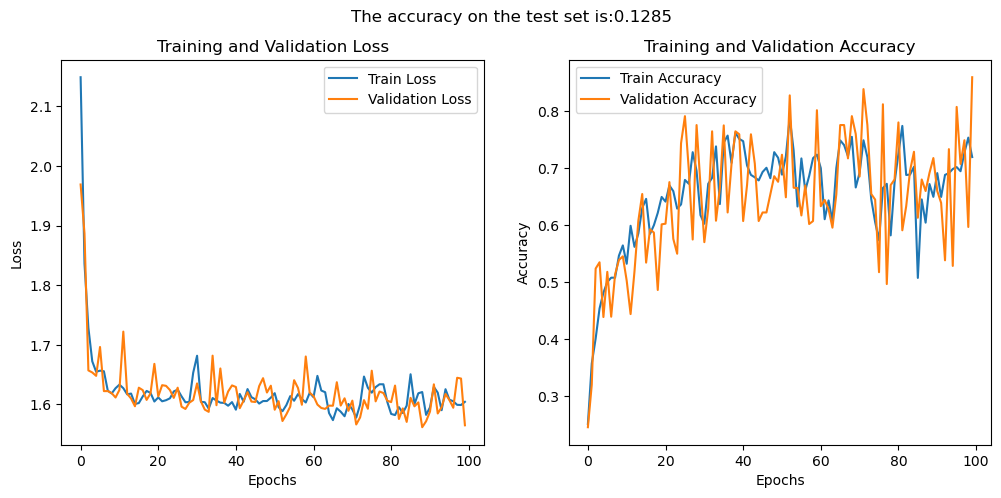

In [18]:
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.suptitle(f"The accuracy on the test set is:{test_acc[0]:.4f}")
plt.show()

## results on the test set

In [19]:
train_data,test_acc=model_train(model2,0.001,100)

Epoch 1/100 | Train Loss: 2.3023 | Val Loss: 2.3010 | Train Acc: 0.1088 | Val Acc: 0.2101
----------
Epoch 2/100 | Train Loss: 2.3002 | Val Loss: 2.2964 | Train Acc: 0.1502 | Val Acc: 0.1887
----------
Epoch 3/100 | Train Loss: 2.2805 | Val Loss: 2.2657 | Train Acc: 0.1746 | Val Acc: 0.1146
----------
Epoch 4/100 | Train Loss: 2.2271 | Val Loss: 2.2309 | Train Acc: 0.2149 | Val Acc: 0.2355
----------
Epoch 5/100 | Train Loss: 2.1732 | Val Loss: 2.0974 | Train Acc: 0.2723 | Val Acc: 0.3617
----------
Epoch 6/100 | Train Loss: 2.1220 | Val Loss: 2.0768 | Train Acc: 0.3370 | Val Acc: 0.4086
----------
Epoch 7/100 | Train Loss: 2.0775 | Val Loss: 1.9803 | Train Acc: 0.3911 | Val Acc: 0.4977
----------
Epoch 8/100 | Train Loss: 2.0422 | Val Loss: 1.9670 | Train Acc: 0.4245 | Val Acc: 0.5023
----------
Epoch 9/100 | Train Loss: 1.9951 | Val Loss: 1.8707 | Train Acc: 0.4860 | Val Acc: 0.6175
----------
Epoch 10/100 | Train Loss: 1.9424 | Val Loss: 1.8613 | Train Acc: 0.5552 | Val Acc: 0.6389


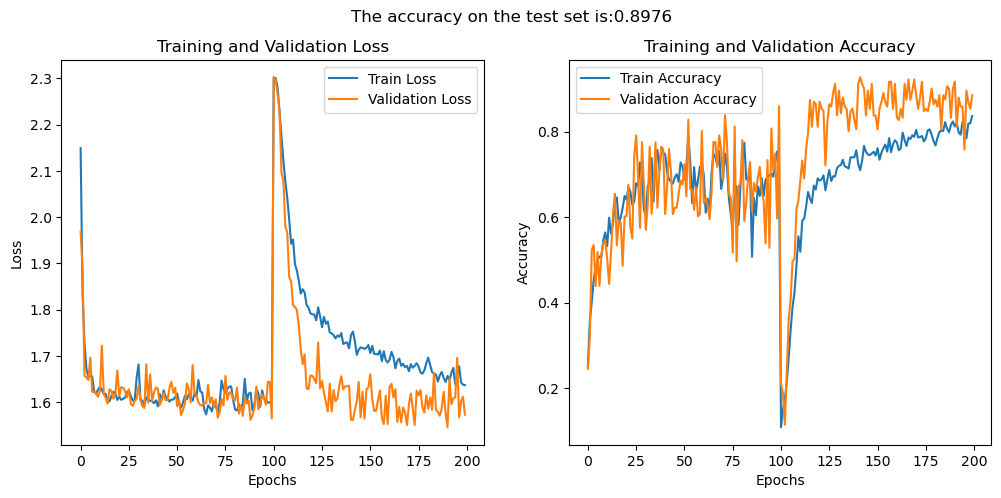

In [20]:
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(train_data['train_loss'], label='Train Loss')
plt.plot(train_data['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_data['train_accuracy'], label='Train Accuracy')
plt.plot(train_data['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.suptitle(f"The accuracy on the test set is:{test_acc[0]:.4f}")

plt.show()

## results on the test sets

# Conclusion

We can see after some parameter setting the simple model can achive the less precision than the more complex model.
Ant it maybe starts overfitting because the test accuracy is very low. But the complex model ha a very good performace, almost 90% accuracy.
